#EDA
 Exploratory Data Analysis using Pandas Matplotlib and Seaborn

 In this notebook, an exploratory data analysis and feature engineering is performed on the dataset in order to extract necessary features from the dataset and perform prediction tasks later on.

## Loading the necessary libraries and loading dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploring data and creating visualisations

### Exploring the Launch Sites
Launches from different Launch Sites

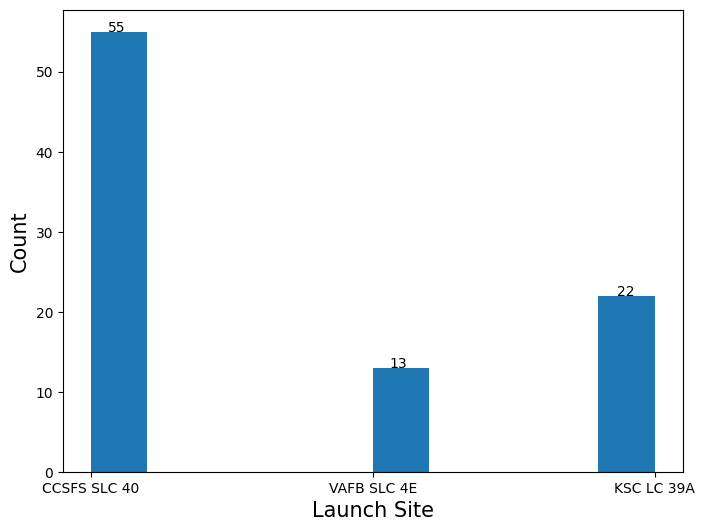

In [5]:
plt.figure(figsize=(8,6))
plt.hist(df.LaunchSite)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Launch Site",fontsize=15);
plt.text(0.06,df.LaunchSite.value_counts()[0],df.LaunchSite.value_counts()[0])
plt.text(1.866,df.LaunchSite.value_counts()[1],df.LaunchSite.value_counts()[1])
plt.text(1.06,df.LaunchSite.value_counts()[2],df.LaunchSite.value_counts()[2]);

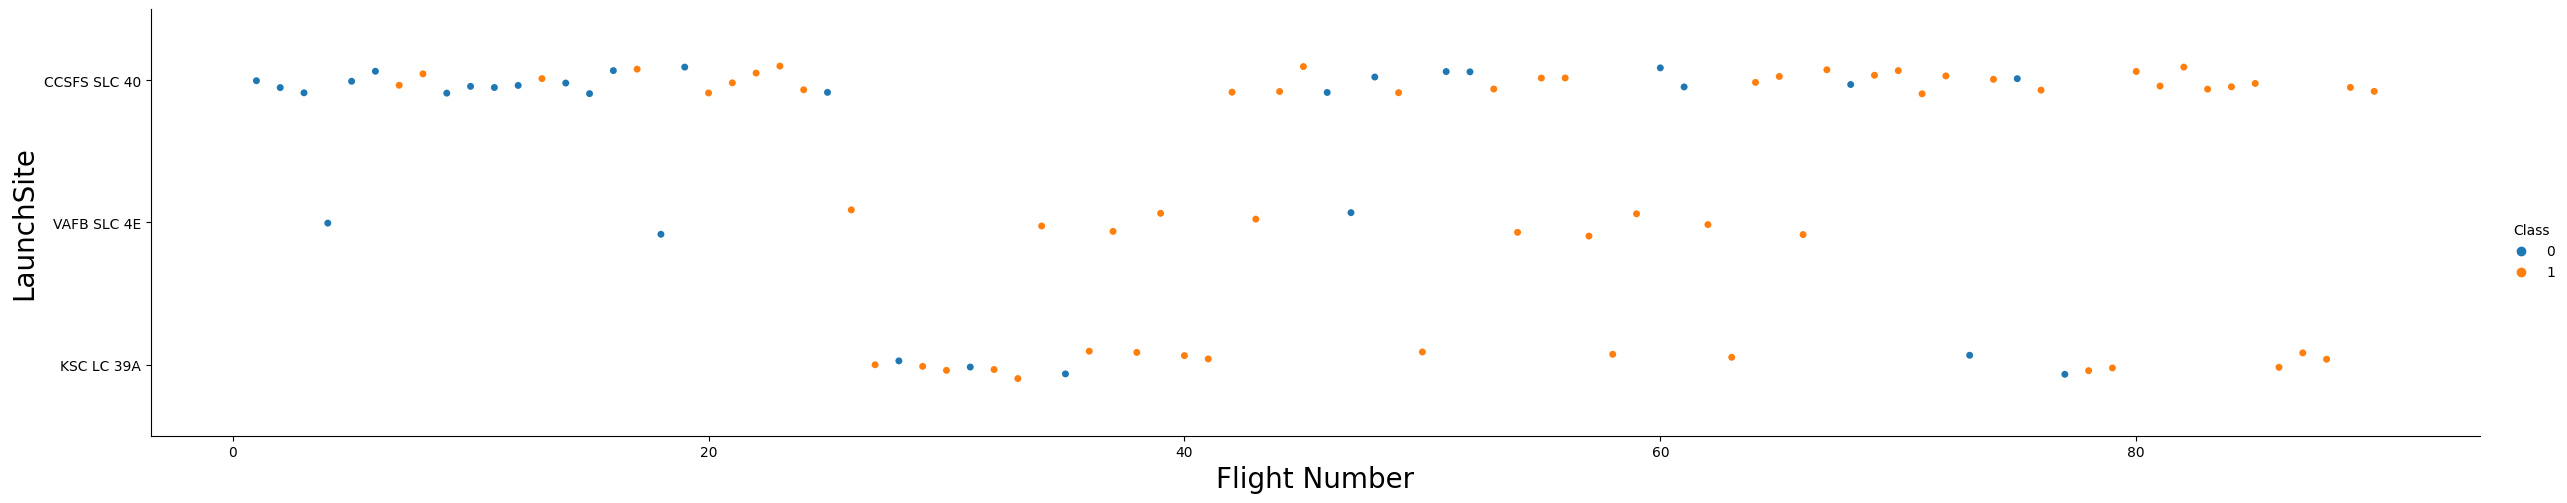

In [6]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

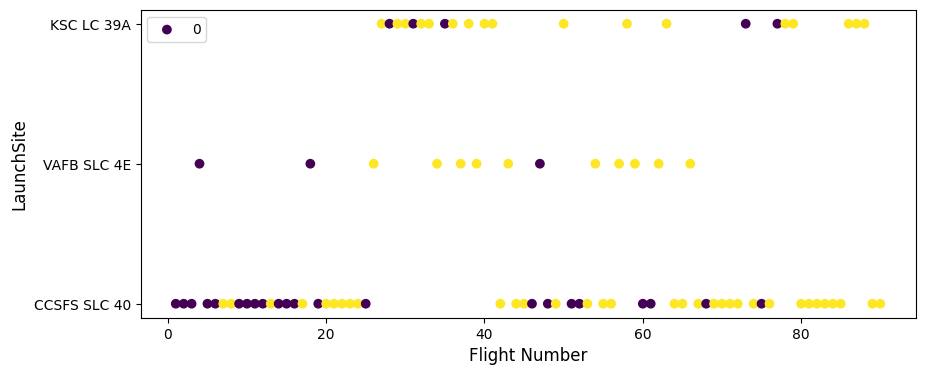

In [7]:
plt.figure(figsize=(10,4))
plt.scatter(df.FlightNumber,df.LaunchSite,c=df.Class)
plt.xlabel("Flight Number",fontsize=12)
plt.ylabel("LaunchSite",fontsize=12)
plt.legend(['0','1'])

In [8]:
len(df[(df.LaunchSite=='CCSFS SLC 40') & (df.Class==1)])/len(df[(df.LaunchSite=='CCSFS SLC 40') ]) *100

60.0

In [9]:
len(df[(df.LaunchSite=='VAFB SLC 4E') & (df.Class==1)])/len(df[(df.LaunchSite=='VAFB SLC 4E') ]) *100

76.92307692307693

In [10]:
len(df[(df.LaunchSite=='KSC LC 39A') & (df.Class==1)])/len(df[(df.LaunchSite=='KSC LC 39A') ]) *100

77.27272727272727

The above 3 visualizations illustrate:



*   Count of launches from the 3 different/unique Launch Sites  
*   Catplot (Categorical plot) of the 3 unique Launch sites and their success/failure wrt the flight number
*   Scatter plot of Launch Site vs flight number and its success/failure



---


We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E have a success rate of 77%.


### Payload Mass vs Launch Sites

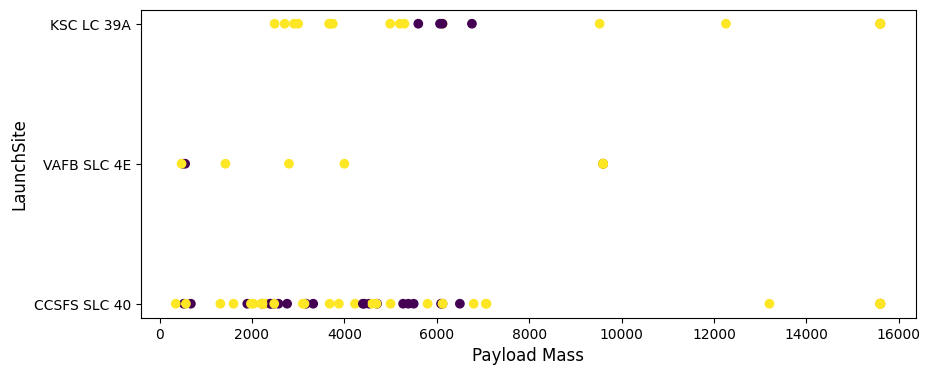

In [11]:
plt.figure(figsize=(10,4))
plt.scatter(df.PayloadMass,df.LaunchSite,c=df.Class)
plt.xlabel("Payload Mass",fontsize=12)
plt.ylabel("LaunchSite",fontsize=12);

Now if we observe Payload Vs. Launch Site scatter point chart we will find for the VAFB-SLC launch site there are no rockets launched for heavypayload mass(greater than 10000).

### Visualizing the relationship between success rate of each orbit type

In [12]:
print(df.Orbit.head())
df.Class.head()

0    LEO
1    LEO
2    ISS
3     PO
4    GTO
Name: Orbit, dtype: object


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
df.Orbit.value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [14]:
s=df.groupby('Orbit')['Class'].mean()
s

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

<BarContainer object of 11 artists>

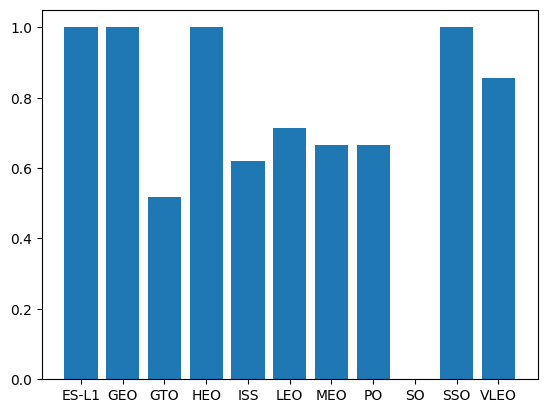

In [15]:
plt.bar(s.index,s)

In [16]:
df[df.Orbit=='SO']

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
72,73,2020-01-19,Falcon 9,6123.547647,SO,KSC LC 39A,None None,4,False,True,False,NaN,5.0,3,B1046,-80.603956,28.608058,0


4 Orbits that have a success rate of 100% are namely: ES-L1, GEO, HEO, SSO

The orbit SO has only 1 entry in the dataset which is a failure and hence a success rate 0

### Visualizing the relationship between FlightNumber and Payload Mass

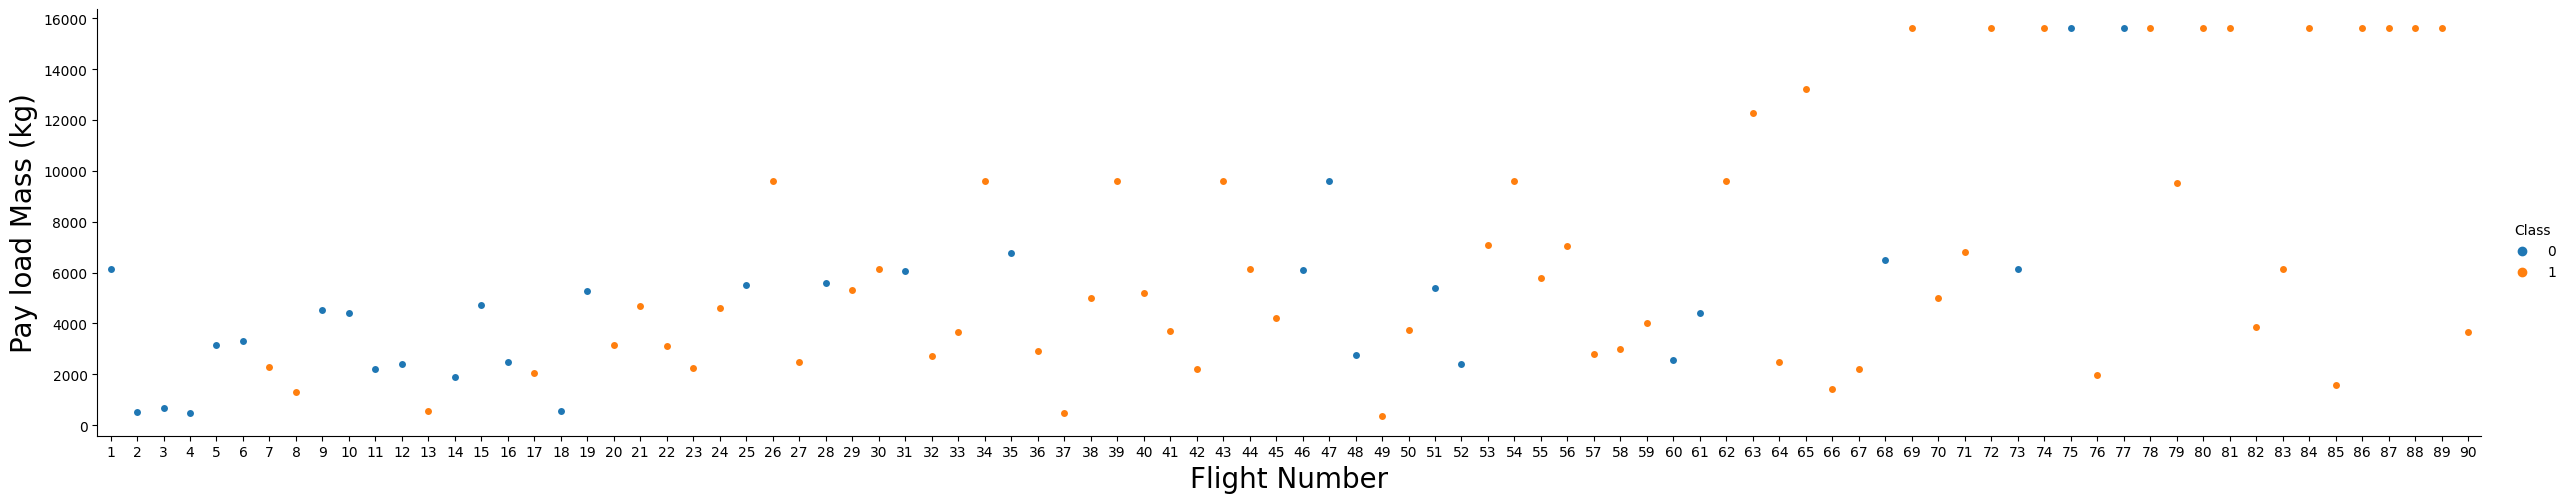

In [17]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualizing the relationship between FlightNumber and Orbit type

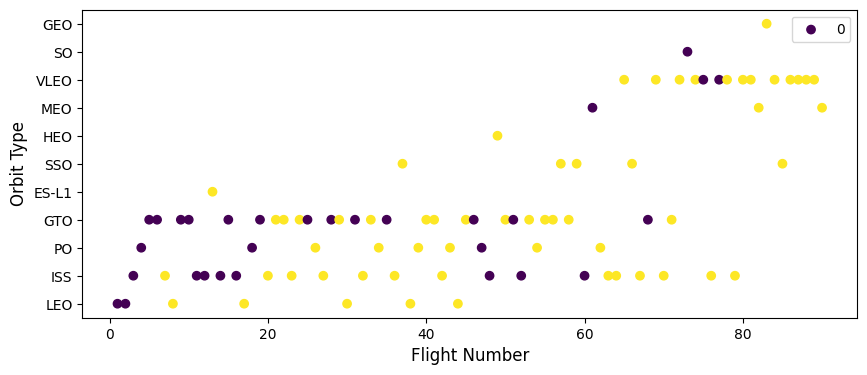

In [18]:
plt.figure(figsize=(10,4))
plt.scatter(df.FlightNumber,df.Orbit,c=df.Class)
plt.xlabel('Flight Number',fontsize=12)
plt.ylabel('Orbit Type',fontsize=12)
plt.legend(['0'])

We observe that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualizing payload mass and Orbit type

Text(0, 0.5, 'Orbit')

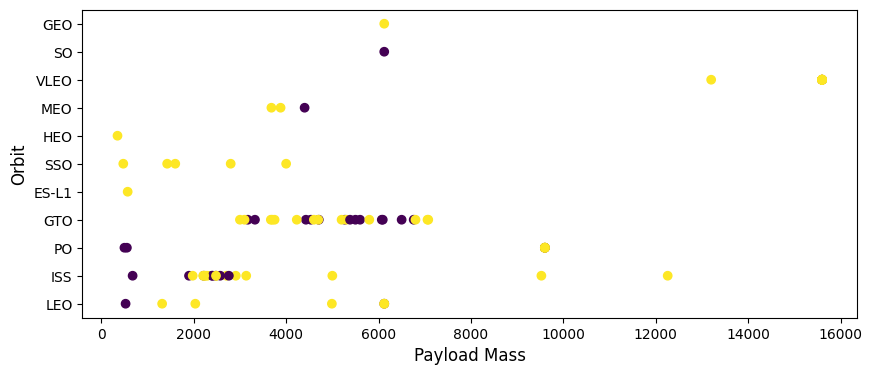

In [19]:
plt.figure(figsize=(10,4))
plt.scatter(df.PayloadMass,df.Orbit,c=df.Class)
plt.xlabel('Payload Mass',fontsize=12)
plt.ylabel('Orbit',fontsize=12)

With heavy payloads (>8000 kg) the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are present.

### Launch Success yearly trend

In [20]:
df['Year']=pd.to_datetime(df.Date).dt.year
s=df.groupby('Year')['Class'].mean()
s

Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

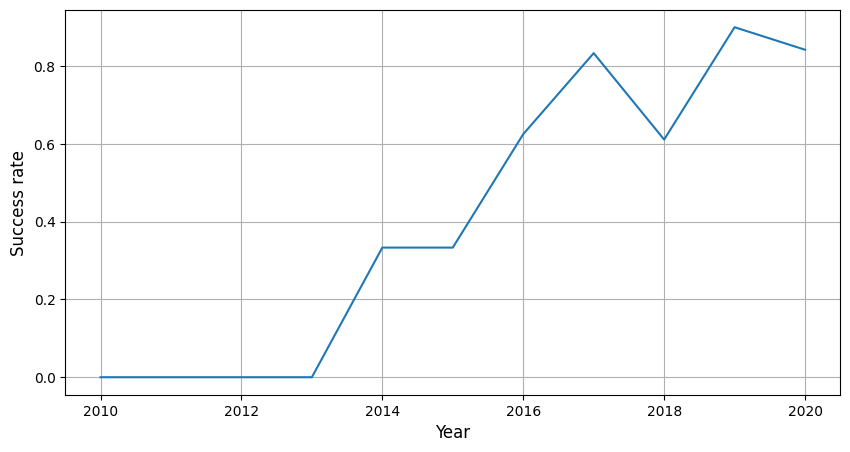

In [21]:
plt.figure(figsize=(10,5))
plt.plot(s.index,s)
plt.grid()
plt.xlabel('Year',fontsize=12)
plt.ylabel('Success rate',fontsize=12);

In [22]:
len(df[(df.Year==2018) & (df.Class==1)])/len(df[(df.Year==2018)])

0.6111111111111112

In [23]:
len(df[(df.Year==2019) & (df.Class==1)])/len(df[(df.Year==2019)])

0.9

We can observe that the sucess rate since 2013 kept increasing till 2020 with a dip in 2018.

## Feature Engineering

Selecting the features that we will use in prediction tasks

In [24]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 Now we apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial

 This is done in order to convert the categorical columns to numeric

In [29]:
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

df1 = pd.get_dummies(features, columns = categorical_cols)
df1

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,True,True,True,5.0,13,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,True,True,True,5.0,12,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0


Now that our data frame only contains numbers, we cast the entire dataframe to variable type float64

In [32]:
df1=df1.astype(float)
df1

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Exporting to CSV

In [33]:
df1.to_csv('dataset_part_3.csv', index=False)